# Analysis of Meta-Learners for Causal Inference

This  Notebook documents the workflow for analyzing the performance of various meta-learners in estimating Conditional Average Treatment Effects (CATE) using analysis dataset. The notebook includes data preprocessing, model training, prediction, evaluation, and result visualization.

## Table of Contents
1. [Loading and Preprocessing Data](#loading-and-preprocessing-data)
2. [Training and Predicting with Meta-Learners](#training-and-predicting-with-meta-learners)
3. [Saving CATE Estimates](#saving-cate-estimates)
4. [Evaluating Meta-Learners](#evaluating-meta-learners)
5. [Visualizing RMSE of Meta-Learners](#visualizing-rmse-of-meta-learners)
6. [Bootstrap EMSE Calculation](#bootstrap-emse-calculation)

## Loading and Preprocessing Data

loading the necessary preprocessing scripts and training classes designed for analyzing the data.

In [2]:
# load required preprocessing scripts and training classes designed for analysis data
from scripts.analysis_data_scripts.data_preprocessor import load_data, preprocessor
from scripts.analysis_data_scripts.train_models import TrainAndPredict

load and preprocess the data using the `data_preprocessor` script to get the training and testing data.

In [ ]:
# load and preprocess the data using the data_preprocessor script to get the training and testing data
df = load_data('../../data/analysis_data/dataset.csv')
print("Data preprocessing...")
X_train, y_train, treatment_train, X_test, y_test, treatment_test = preprocessor(df)
print("Preprocessing done!")

Data preprocessing...
Preprocessing done!


## Training and Predicting with Meta-Learners
instantiate the `TrainAndPredict` class with the preprocessed data and collect predictions for the outcome variable given by each meta-learner using the `train_and_predict` method.

In [ ]:
# Instantiate TrainAndPredict class with preprocessed data
train_predictor = TrainAndPredict(X_train, y_train, treatment_train, X_test,treatment_test)

# collect the predictions for outcome variable given by each meta_learner using the train_and_predict method
s_predictions, t_predictions, x_predictions, r_predictions = train_predictor.train_and_predict()

# get the cate estimates for each meta_learner using the get_cate_estimates method from analysis_data_scripts
s_estimates, t_estimates, x_estimates, r_estimates = train_predictor.get_cate_estimates(s_predictions, t_predictions, x_predictions, r_predictions)


## Saving CATE Estimates
The CATE estimates for each meta-learner are saved to CSV files for further analysis.

In [ ]:
# Save the CATE estimates to a CSV file
s_output_path = '../../results/analysis_data_results/test_data/s_predictions.csv'
t_output_path = '../../results/analysis_data_results/test_data/t_predictions.csv'
x_output_path = '../../results/analysis_data_results/test_data/x_predictions.csv'
r_output_path = '../../results/analysis_data_results/test_data/r_predictions.csv'

s_estimates.to_csv(s_output_path, index=False)
t_estimates.to_csv(t_output_path, index=False)
x_estimates.to_csv(x_output_path, index=False)
r_estimates.to_csv(r_output_path, index=False)

s_predictions:      pred_treated  pred_control
0         0.629880      0.627127
1        -0.237506     -0.236265
2         1.351146      1.350828
3         1.291522      1.292459
4        -0.187408     -0.187421
...            ...           ...
2074     -0.344813     -0.345480
2075      0.594295      0.593950
2076     -0.599323     -0.599506
2077     -0.781965     -0.782701
2078     -0.641935     -0.642964

[2079 rows x 2 columns]
t_predictions:      pred_treated  pred_control
0         0.708611      0.639899
1        -0.195640     -0.163077
2         1.262174      1.250115
3         1.262174      1.250115
4        -0.195640     -0.163077
...            ...           ...
2074     -0.381721     -0.396255
2075      0.691974      0.639899
2076     -0.655089     -0.661279
2077     -0.698846     -0.699909
2078     -0.655089     -0.661279

[2079 rows x 2 columns]
x_predictions:      pred_treated  pred_control  cate_estimates
0         0.708611      0.639899       -0.027649
1        -0.195640

## Evaluating Meta-Learners
evaluate the performance of the meta-learners using the `evaluate_meta_learner` method from the analysis data scripts. This function compares the predicted outcomes with actual outcomes and returns metrics such as RMSE, bias, and variance.


In [ ]:
# Evaluate the performance of the meta_learners using the evaluate_meta_learner method from analysis_data_scripts
from scripts.analysis_data_scripts.evaluate_models import evaluate_meta_learner

The evaluation metrics for each meta-learner are calculated and printed.


In [8]:
# Extract true outcomes for RMSE calculation
true_outcomes = y_test

results = {}

# Calculate RMSE for S-Learner
s_metrics = evaluate_meta_learner(s_predictions, y_test, treatment_test, 'S-Learner')
print("S-Learner evaluation metrics:", s_metrics)

# Calculate RMSE for T-Learner
t_metrics = evaluate_meta_learner(t_predictions, y_test, treatment_test, 'T-Learner')
print("T-Learner evaluation metrics:", t_metrics)

# Calculate RMSE for X-Learner
x_metrics = evaluate_meta_learner(x_predictions, y_test, treatment_test, 'X-Learner')
print("X-Learner evaluation metrics:", x_metrics)

S-Learner evaluation metrics: {'S-Learner_RMSE': 1.168396285627171, 'S-Learner_Bias': 0.1284884150904221, 'S-Learner_Variance': 0.9497100609666357}
T-Learner evaluation metrics: {'T-Learner_RMSE': 1.1708287511276365, 'T-Learner_Bias': 0.13188101535414684, 'T-Learner_Variance': 0.9540661051944127}
X-Learner evaluation metrics: {'X-Learner_RMSE': 1.1708287511276365, 'X-Learner_Bias': 0.13188101535414684, 'X-Learner_Variance': 0.9540661051944127}


Above metrics represent evaluation metrics for three different meta-learners: S-Learner, T-Learner, and X-Learner. These metrics include RMSE (Root Mean Squared Error), Bias, and Variance. These results show that:

### Insights:
- **S-Learner** has the lowest RMSE, indicating it has the best predictive accuracy among the three.
- **S-Learner** also has the lowest bias, suggesting it is the most accurate in terms of average prediction error.
- **S-Learner** has the lowest variance, indicating it is the most consistent in its predictions.

In summary, based on these metrics, the S-Learner appears to perform slightly better than the T-Learner and X-Learner in terms of predictive accuracy, bias, and variance.

## Visualizing RMSE of Meta-Learners

visualize the RMSE values of the meta-learners on the test set using a bar plot.

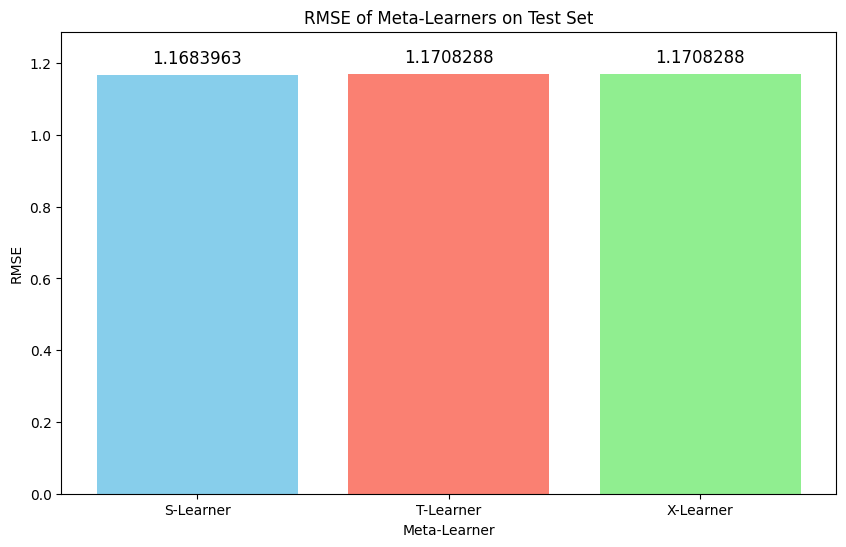

In [6]:
import matplotlib.pyplot as plt

# fetch the RMSE values from the evaluation results
s_rmse = s_metrics['S-Learner_RMSE']
t_rmse = t_metrics['T-Learner_RMSE']
x_rmse = x_metrics['X-Learner_RMSE']

# RMSE values for each meta-learner with more decimal precision
rmse_values = [s_rmse, t_rmse, x_rmse]
learners = ['S-Learner', 'T-Learner', 'X-Learner']

# Plotting the RMSE values
plt.figure(figsize=(10, 6))
plt.bar(learners, rmse_values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.ylabel('RMSE')
plt.xlabel('Meta-Learner')
plt.title('RMSE of Meta-Learners on Test Set')
plt.ylim(0, max(rmse_values) * 1.1)  # Add some space above the highest bar for readability
# Annotate the bars with RMSE values with higher precision
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.02, f"{v:.7f}", ha='center', va='bottom', fontsize=12)

plt.show()


## Bootstrap EMSE Calculation
calculate the variance of estimated CATE given by each meta-learner using the `bootstrap_emse_no_groundtruth` method.


In [7]:
from scripts.analysis_data_scripts.evaluate_models import bootstrap_emse_no_groundtruth
from models.Meta_Learners.meta_learner_models import S_learner_model, T_learner_model, X_learner_model, R_learner_model

# calculate varianle of eastimated cate given by each meta learner
s_emse = bootstrap_emse_no_groundtruth(X_train, treatment_train, S_learner_model, 'S-Learner')
print(f"s_emse:{s_emse}")

t_emse = bootstrap_emse_no_groundtruth(X_train, treatment_train, T_learner_model, 'T-Learner')
print(f"t_emse:{t_emse}")

x_emse = bootstrap_emse_no_groundtruth(X_train, treatment_train, X_learner_model, 'X-Learner')
print(f"x_emse:{x_emse}")

r_emse = bootstrap_emse_no_groundtruth(X_train, treatment_train, R_learner_model, 'R-Learner')
print(f"r_emse:{r_emse}")

s_emse:0.00015001302841996403
t_emse:0.0003859706755926306
x_emse:0.9497884984294933
r_emse:2.0372812556573402e-05


The results of the bootstrap EMSE calculation represent the variance in estimated CATE values across bootstrap samples for each meta-learner. The EMSE values for the meta-learners are as follows:

- **S-Learner EMSE**: 0.00015001302841996403
- **T-Learner EMSE**: 0.0003859706755926306
- **X-Learner EMSE**: 0.9497884984294933
- **R-Learner EMSE**: 2.0372812556573402e-05

These values indicate the variability in the CATE estimates produced by each meta-learner when subjected to bootstrap sampling. Lower EMSE values suggest more stable and consistent CATE estimates.